##### Steps for reading in dataset (following download), initial QC, dim reduction/clustering and saving out the myeloid cluster for **GSE184880**

file previously downloaded:
GSE184880_RAW.tar

unzipped using 
``` bash
tar -xvf GSE184880_RAW.tar
```

This gives the following files: 
* GSM5599220_Norm1.barcodes.tsv.gz
* GSM5599220_Norm1.genes.tsv.gz
* GSM5599220_Norm1.matrix.mtx.gz
* GSM5599221_Norm2.barcodes.tsv.gz
* GSM5599221_Norm2.genes.tsv.gz
* GSM5599221_Norm2.matrix.mtx.gz
* GSM5599222_Norm3.barcodes.tsv.gz
* GSM5599222_Norm3.genes.tsv.gz
* GSM5599222_Norm3.matrix.mtx.gz
* GSM5599223_Norm4.barcodes.tsv.gz
* GSM5599223_Norm4.genes.tsv.gz
* GSM5599223_Norm4.matrix.mtx.gz
* GSM5599224_Norm5.barcodes.tsv.gz
* GSM5599224_Norm5.genes.tsv.gz
* GSM5599224_Norm5.matrix.mtx.gz
* GSM5599225_Cancer1.barcodes.tsv.gz
* GSM5599225_Cancer1.genes.tsv.gz
* GSM5599225_Cancer1.matrix.mtx.gz
* GSM5599226_Cancer2.barcodes.tsv.gz
* GSM5599226_Cancer2.genes.tsv.gz
* GSM5599226_Cancer2.matrix.mtx.gz
* GSM5599227_Cancer3.barcodes.tsv.gz
* GSM5599227_Cancer3.genes.tsv.gz
* GSM5599227_Cancer3.matrix.mtx.gz
* GSM5599228_Cancer4.barcodes.tsv.gz
* GSM5599228_Cancer4.genes.tsv.gz
* GSM5599228_Cancer4.matrix.mtx.gz
* GSM5599229_Cancer5.barcodes.tsv.gz
* GSM5599229_Cancer5.genes.tsv.gz
* GSM5599229_Cancer5.matrix.mtx.gz
* GSM5599230_Cancer6.barcodes.tsv.gz
* GSM5599230_Cancer6.genes.tsv.gz
* GSM5599230_Cancer6.matrix.mtx.gz
* GSM5599231_Cancer7.barcodes.tsv.gz
* GSM5599231_Cancer7.genes.tsv.gz
* GSM5599231_Cancer7.matrix.mtx.gz

Files were then organised into seperate folders for each patient and named with correct file names.

In [1]:
#set wd
getwd()
setwd('/scratch/user/s4436039/scdata/GSE184880')
getwd()

[1] "/scratch/user/s4436039/Nikita-project"

[1] "/scratch/user/s4436039/scdata/GSE184880"

In [2]:
#Load packages
library(dplyr)
library(Seurat)
library(patchwork)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Warning message:
“package ‘Seurat’ was built under R version 4.3.2”
Loading required package: SeuratObject

Loading required package: sp

Warning message:
“package ‘sp’ was built under R version 4.3.2”

Attaching package: ‘SeuratObject’


The following object is masked from ‘package:base’:

    intersect


Warning message:
“package ‘patchwork’ was built under R version 4.3.2”


In [3]:
#load all datasets
OC_Cancer1.data <- Read10X(data.dir = "/scratch/user/s4436039/scdata/GSE184880/Cancer1")
OC_Cancer2.data <- Read10X(data.dir = "/scratch/user/s4436039/scdata/GSE184880/Cancer2")
OC_Cancer3.data <- Read10X(data.dir = "/scratch/user/s4436039/scdata/GSE184880/Cancer3")
OC_Cancer4.data <- Read10X(data.dir = "/scratch/user/s4436039/scdata/GSE184880/Cancer4")
OC_Cancer5.data <- Read10X(data.dir = "/scratch/user/s4436039/scdata/GSE184880/Cancer5")
OC_Cancer6.data <- Read10X(data.dir = "/scratch/user/s4436039/scdata/GSE184880/Cancer6")
OC_Cancer7.data <- Read10X(data.dir = "/scratch/user/s4436039/scdata/GSE184880/Cancer7")
OC_Norm1.data <- Read10X(data.dir = "/scratch/user/s4436039/scdata/GSE184880/Norm1")
OC_Norm2.data <- Read10X(data.dir = "/scratch/user/s4436039/scdata/GSE184880/Norm2")
OC_Norm3.data <- Read10X(data.dir = "/scratch/user/s4436039/scdata/GSE184880/Norm3")
OC_Norm4.data <- Read10X(data.dir = "/scratch/user/s4436039/scdata/GSE184880/Norm4")
OC_Norm5.data <- Read10X(data.dir = "/scratch/user/s4436039/scdata/GSE184880/Norm5")

In [4]:
#Add dataset info to colnames
colnames(OC_Cancer1.data) <- paste0("GSE184880_Cancer1_", colnames(OC_Cancer1.data))
colnames(OC_Cancer2.data) <- paste0("GSE184880_Cancer2_", colnames(OC_Cancer2.data))
colnames(OC_Cancer3.data) <- paste0("GSE184880_Cancer3_", colnames(OC_Cancer3.data))
colnames(OC_Cancer4.data) <- paste0("GSE184880_Cancer4_", colnames(OC_Cancer4.data))
colnames(OC_Cancer5.data) <- paste0("GSE184880_Cancer5_", colnames(OC_Cancer5.data))
colnames(OC_Cancer6.data) <- paste0("GSE184880_Cancer6_", colnames(OC_Cancer6.data))
colnames(OC_Cancer7.data) <- paste0("GSE184880_Cancer7_", colnames(OC_Cancer7.data))
colnames(OC_Norm1.data) <- paste0("GSE184880_Norm1_", colnames(OC_Norm1.data))
colnames(OC_Norm2.data) <- paste0("GSE184880_Norm2_", colnames(OC_Norm2.data))
colnames(OC_Norm3.data) <- paste0("GSE184880_Norm3_", colnames(OC_Norm3.data))
colnames(OC_Norm4.data) <- paste0("GSE184880_Norm4_", colnames(OC_Norm4.data))
colnames(OC_Norm5.data) <- paste0("GSE184880_Norm5_", colnames(OC_Norm5.data))

In [6]:
head(colnames(OC_Cancer1.data))

[1] "GSE184880_Cancer1_AAACCCAAGTATAGGT-1"
[2] "GSE184880_Cancer1_AAACCCACAAGGTACG-1"
[3] "GSE184880_Cancer1_AAACCCACACCATAAC-1"
[4] "GSE184880_Cancer1_AAACCCACAGCTGCCA-1"
[5] "GSE184880_Cancer1_AAACCCACATAACAGA-1"
[6] "GSE184880_Cancer1_AAACCCACATGACGGA-1"

In [13]:
#create seperate seurat object for each sample
OC_Cancer1 <- CreateSeuratObject(counts = OC_Cancer1.data, project = "GSE184880", min.cells = 3, min.features = 200)

#add metadata to sample
OC_Cancer1@meta.data$sample_type <- "tumour"
OC_Cancer1@meta.data$cancer_type <- "HGSOC"
OC_Cancer1@meta.data$patient_id <- "Cancer1"

In [14]:
#Repeat for remaining samples

#create seperate seurat object for each sample
OC_Cancer2 <- CreateSeuratObject(counts = OC_Cancer2.data, project = "GSE184880", min.cells = 3, min.features = 200)

#add metadata to sample
OC_Cancer2@meta.data$sample_type <- "tumour"
OC_Cancer2@meta.data$cancer_type <- "HGSOC"
OC_Cancer2@meta.data$patient_id <- "Cancer2"

#create seperate seurat object for each sample
OC_Cancer3 <- CreateSeuratObject(counts = OC_Cancer3.data, project = "GSE184880", min.cells = 3, min.features = 200)

#add metadata to sample
OC_Cancer3@meta.data$sample_type <- "tumour"
OC_Cancer3@meta.data$cancer_type <- "HGSOC"
OC_Cancer3@meta.data$patient_id <- "Cancer3"

#create seperate seurat object for each sample
OC_Cancer4 <- CreateSeuratObject(counts = OC_Cancer4.data, project = "GSE184880", min.cells = 3, min.features = 200)

#add metadata to sample
OC_Cancer4@meta.data$sample_type <- "tumour"
OC_Cancer4@meta.data$cancer_type <- "HGSOC"
OC_Cancer4@meta.data$patient_id <- "Cancer4"

#create seperate seurat object for each sample
OC_Cancer5 <- CreateSeuratObject(counts = OC_Cancer5.data, project = "GSE184880", min.cells = 3, min.features = 200)

#add metadata to sample
OC_Cancer5@meta.data$sample_type <- "tumour"
OC_Cancer5@meta.data$cancer_type <- "HGSOC"
OC_Cancer5@meta.data$patient_id <- "Cancer5"

#create seperate seurat object for each sample
OC_Cancer6 <- CreateSeuratObject(counts = OC_Cancer6.data, project = "GSE184880", min.cells = 3, min.features = 200)

#add metadata to sample
OC_Cancer6@meta.data$sample_type <- "tumour"
OC_Cancer6@meta.data$cancer_type <- "HGSOC"
OC_Cancer6@meta.data$patient_id <- "Cancer6"

#create seperate seurat object for each sample
OC_Cancer7 <- CreateSeuratObject(counts = OC_Cancer7.data, project = "GSE184880", min.cells = 3, min.features = 200)

#add metadata to sample
OC_Cancer7@meta.data$sample_type <- "tumour"
OC_Cancer7@meta.data$cancer_type <- "HGSOC"
OC_Cancer7@meta.data$patient_id <- "Cancer7"

#create seperate seurat object for each sample
OC_Norm1 <- CreateSeuratObject(counts = OC_Norm1.data, project = "GSE184880", min.cells = 3, min.features = 200)

#add metadata to sample
OC_Norm1@meta.data$sample_type <- "Healthy_ovary"
OC_Norm1@meta.data$cancer_type <- "Healthy"
OC_Norm1@meta.data$patient_id <- "Norm1"

#create seperate seurat object for each sample
OC_Norm2 <- CreateSeuratObject(counts = OC_Norm2.data, project = "GSE184880", min.cells = 3, min.features = 200)

#add metadata to sample
OC_Norm2@meta.data$sample_type <- "Healthy_ovary"
OC_Norm2@meta.data$cancer_type <- "Healthy"
OC_Norm2@meta.data$patient_id <- "Norm2"

#create seperate seurat object for each sample
OC_Norm3 <- CreateSeuratObject(counts = OC_Norm3.data, project = "GSE184880", min.cells = 3, min.features = 200)

#add metadata to sample
OC_Norm3@meta.data$sample_type <- "Healthy_ovary"
OC_Norm3@meta.data$cancer_type <- "Healthy"
OC_Norm3@meta.data$patient_id <- "Norm3"

#create seperate seurat object for each sample
OC_Norm4 <- CreateSeuratObject(counts = OC_Norm4.data, project = "GSE184880", min.cells = 3, min.features = 200)

#add metadata to sample
OC_Norm4@meta.data$sample_type <- "Healthy_ovary"
OC_Norm4@meta.data$cancer_type <- "Healthy"
OC_Norm4@meta.data$patient_id <- "Norm4"

#create seperate seurat object for each sample
OC_Norm5 <- CreateSeuratObject(counts = OC_Norm5.data, project = "GSE184880", min.cells = 3, min.features = 200)

#add metadata to sample
OC_Norm5@meta.data$sample_type <- "Healthy_ovary"
OC_Norm5@meta.data$cancer_type <- "Healthy"
OC_Norm5@meta.data$patient_id <- "Norm5"

In [17]:
head(OC_Norm3@meta.data) 

,orig.ident,nCount_RNA,nFeature_RNA,sample_type,cancer_type,patient_id
,<fct>,<dbl>,<int>,<chr>,<chr>,<chr>
GSE184880_Norm3_AAACCCAAGACCAAAT-1,GSE184880,19746,5070,Healthy_ovary,Healthy,Norm3
GSE184880_Norm3_AAACCCAAGACTCTAC-1,GSE184880,4703,1765,Healthy_ovary,Healthy,Norm3
GSE184880_Norm3_AAACCCAAGAGCACTG-1,GSE184880,37517,6089,Healthy_ovary,Healthy,Norm3
GSE184880_Norm3_AAACCCAAGCCTGTCG-1,GSE184880,4413,1348,Healthy_ovary,Healthy,Norm3
GSE184880_Norm3_AAACCCAAGCTGGAGT-1,GSE184880,6284,2098,Healthy_ovary,Healthy,Norm3
GSE184880_Norm3_AAACCCAGTCGAACAG-1,GSE184880,49638,6290,Healthy_ovary,Healthy,Norm3


In [24]:
#Merge seurat objects

OC <- merge(OC_Cancer1, y = c(OC_Cancer2, OC_Cancer3, OC_Cancer4, OC_Cancer5, OC_Cancer6, OC_Cancer7, OC_Norm1, OC_Norm2, OC_Norm3, OC_Norm4, OC_Norm5), project = "GSE184880")

In [28]:
OC
head(OC@meta.data)
tail(OC@meta.data)

An object of class Seurat 
22334 features across 64659 samples within 1 assay 
Active assay: RNA (22334 features, 0 variable features)
 12 layers present: counts.1, counts.2, counts.3, counts.4, counts.5, counts.6, counts.7, counts.8, counts.9, counts.10, counts.11, counts.12

,orig.ident,nCount_RNA,nFeature_RNA,sample_type,cancer_type,patient_id
,<chr>,<dbl>,<int>,<chr>,<chr>,<chr>
GSE184880_Cancer1_AAACCCAAGTATAGGT-1,GSE184880,4528,1744,tumour,HGSOC,Cancer1
GSE184880_Cancer1_AAACCCACAAGGTACG-1,GSE184880,61563,6278,tumour,HGSOC,Cancer1
GSE184880_Cancer1_AAACCCACACCATAAC-1,GSE184880,31254,6009,tumour,HGSOC,Cancer1
GSE184880_Cancer1_AAACCCACAGCTGCCA-1,GSE184880,9374,2655,tumour,HGSOC,Cancer1
GSE184880_Cancer1_AAACCCACATAACAGA-1,GSE184880,4304,1728,tumour,HGSOC,Cancer1
GSE184880_Cancer1_AAACCCACATGACGGA-1,GSE184880,2659,1246,tumour,HGSOC,Cancer1


,orig.ident,nCount_RNA,nFeature_RNA,sample_type,cancer_type,patient_id
,<chr>,<dbl>,<int>,<chr>,<chr>,<chr>
GSE184880_Norm5_TTTGGTTTCTATACGG-1,GSE184880,14246,4432,Healthy_ovary,Healthy,Norm5
GSE184880_Norm5_TTTGTTGAGTAACGTA-1,GSE184880,8667,3127,Healthy_ovary,Healthy,Norm5
GSE184880_Norm5_TTTGTTGCATCCTGTC-1,GSE184880,784,518,Healthy_ovary,Healthy,Norm5
GSE184880_Norm5_TTTGTTGGTAGTGCGA-1,GSE184880,120556,7910,Healthy_ovary,Healthy,Norm5
GSE184880_Norm5_TTTGTTGGTATCGTTG-1,GSE184880,1361,703,Healthy_ovary,Healthy,Norm5
GSE184880_Norm5_TTTGTTGGTCAGTCCG-1,GSE184880,8448,2042,Healthy_ovary,Healthy,Norm5


Warning message:
“Default search for "data" layer in "RNA" assay yielded no results; utilizing "counts" layer instead.”


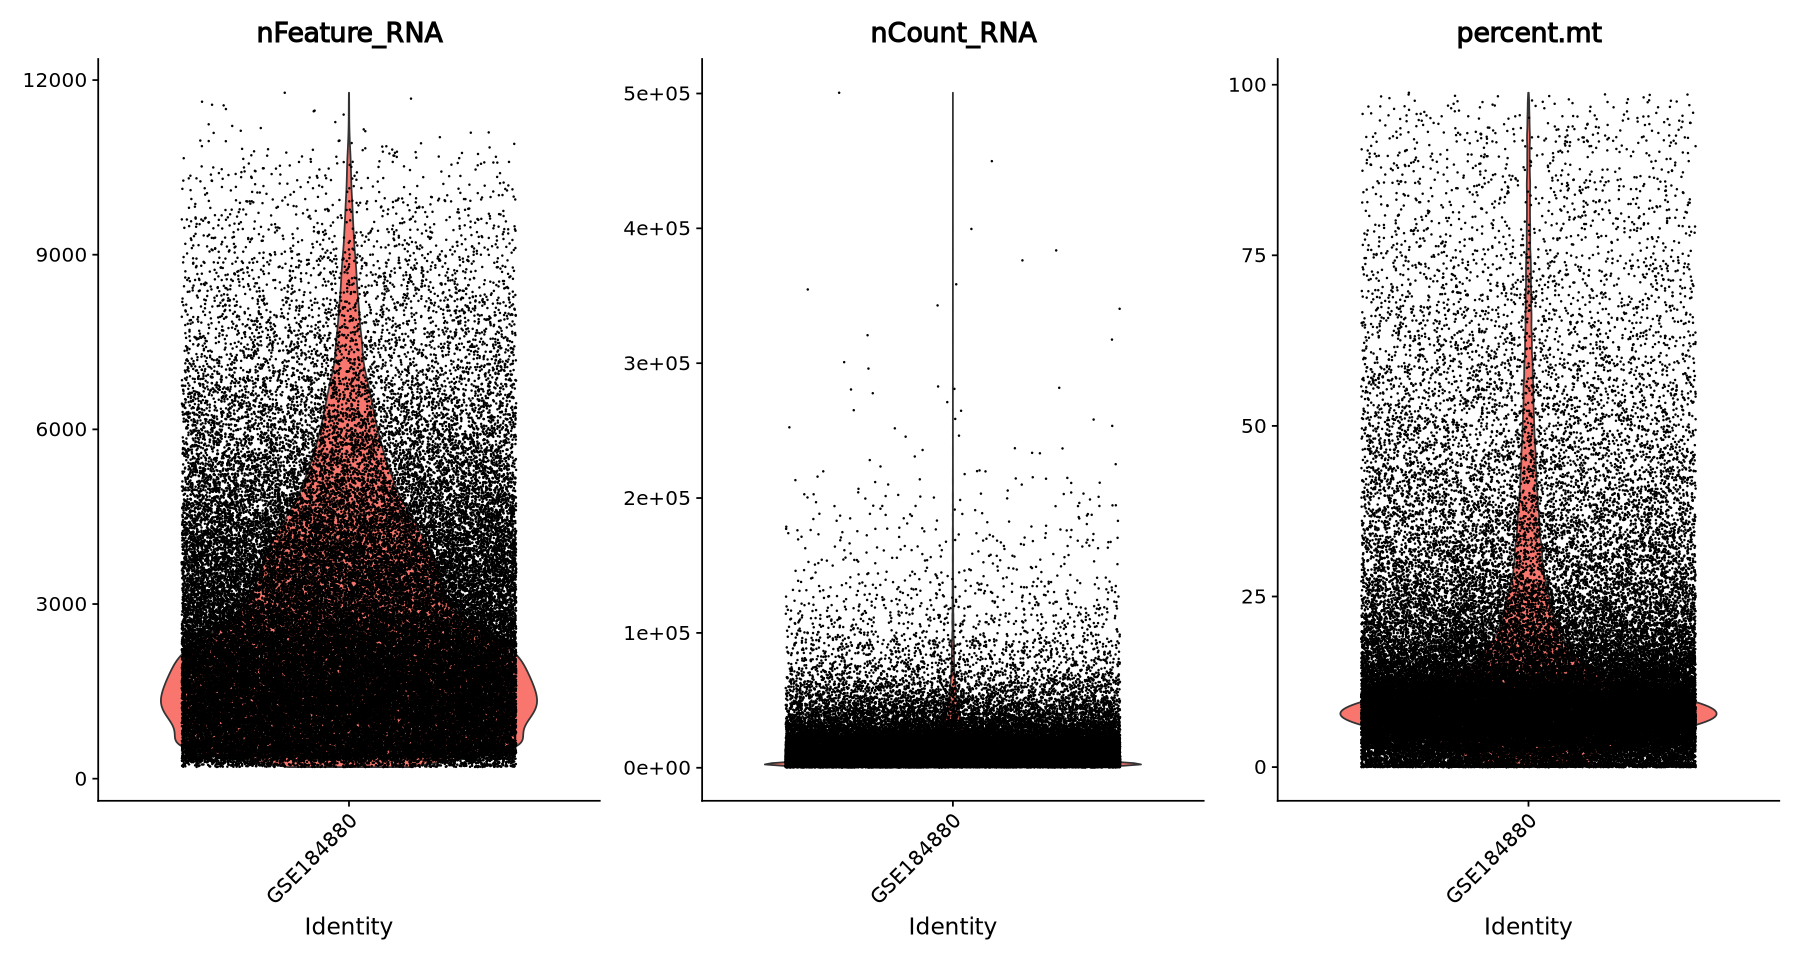

In [29]:
#QC Steps 
OC[["percent.mt"]] <- PercentageFeatureSet(OC, pattern = "^MT-")
#Visualise QC metrics
options(repr.plot.height=8, repr.plot.width=15)
VlnPlot(OC, features = c("nFeature_RNA", "nCount_RNA", "percent.mt"), ncol = 3)

In [30]:
#Normalise the data
OC <- NormalizeData(OC)
#Find variable features
OC <- FindVariableFeatures(OC, selection.method = "vst", nfeatures = 2000)
#Scale the data
OC <- ScaleData(OC, vars.to.regress = c("percent.mt", "nCount_RNA"))
#Run pca
OC <- RunPCA(OC, features = VariableFeatures(object = OC))

Normalizing layer: counts.1

Normalizing layer: counts.2

Normalizing layer: counts.3

Normalizing layer: counts.4

Normalizing layer: counts.5

Normalizing layer: counts.6

Normalizing layer: counts.7

Normalizing layer: counts.8

Normalizing layer: counts.9

Normalizing layer: counts.10

Normalizing layer: counts.11

Normalizing layer: counts.12

Finding variable features for layer counts.1

Finding variable features for layer counts.2

Finding variable features for layer counts.3

Finding variable features for layer counts.4

Finding variable features for layer counts.5

Finding variable features for layer counts.6

Finding variable features for layer counts.7

Finding variable features for layer counts.8

Finding variable features for layer counts.9

Finding variable features for layer counts.10

Finding variable features for layer counts.11

Finding variable features for layer counts.12

Regressing out percent.mt, nCount_RNA

Centering and scaling data matrix

PC_ 1 
Positive:  CA

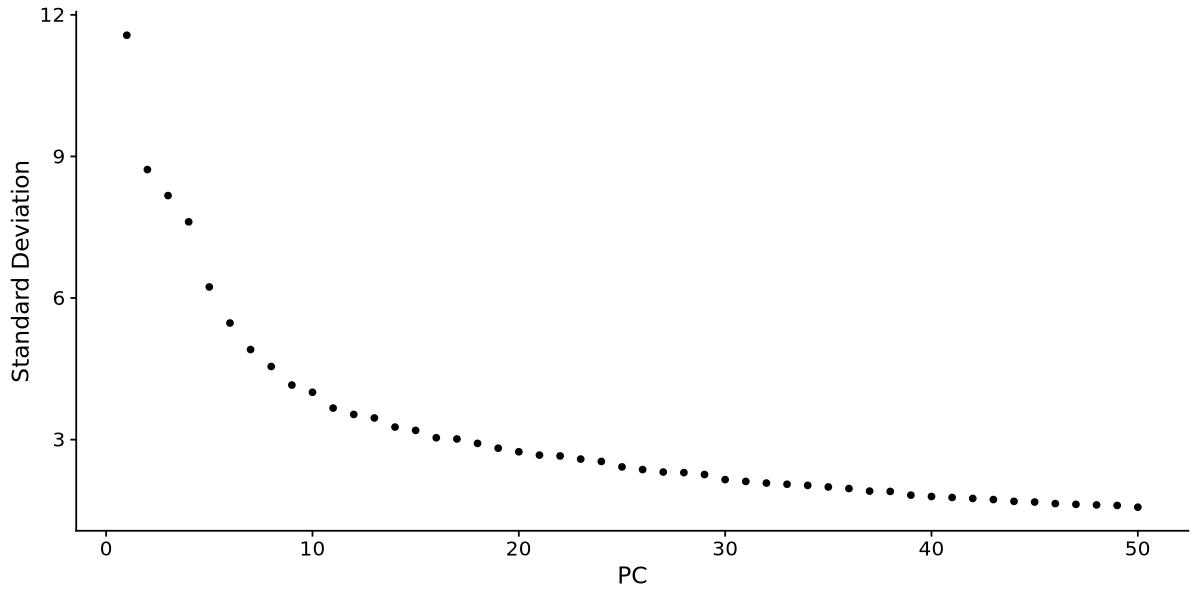

In [32]:
#make elbow plot
options(repr.plot.height=5, repr.plot.width=10)
ElbowPlot(OC, ndims=50)
#in GSE213243 decided to use 40 PC, staying consistent across datasets